In [4]:
import keras
import os
os.environ['KERAS_BACKEND']='tensorflow'
import h5py
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Input, Dense, Convolution2D, Conv2DTranspose, Dropout
from keras.layers import MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.callbacks import TensorBoard

def config():
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.5
    set_session(tf.Session(config=config))

print('libs loaded')

libs loaded


In [18]:
def get_list():
    X_filenames = []
    path = '../input/train/'
    for root, dirs, files in os.walk(path):
        for name in files:
            X_filenames.append(os.path.join(root, name).split('/')[-1])
    return X_filenames
X_filenames = get_list()

(2, 128, 128, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
9642


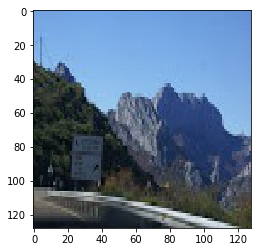

In [48]:

def load_batch(batch_size):
    path = '../input/train/'
    X_list = []
    Y_list = []
    for i in range(batch_size):
        name = random.choice(X_filenames)
        X_list.append(name)
        Y_list.append(int(name.split('.')[1]))
        
    #print(X_list)
    #print(Y_list)
    
    size = 128
    data_shape = (batch_size, size, size, 3)
    X = np.zeros(data_shape)
    
    for i in range(batch_size):
        f = X_list[i]
        img = np.array(cv2.imread(path + f))# BGR
        #print(img.shape)
        X[i] = img
        
    X = X.astype('float32')
    X /= 255
    
    Y = np.zeros((batch_size, 14950)) # one hot
    Y[np.arange(batch_size), Y_list] = 1
    
    return X, Y
    
X_train, Y_train = load_batch(2)
print(X_train.shape)
plt.imshow(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB))
print(Y_train)

for i in range(len(Y_train[0])):
    if Y_train[0][i] ==1:
        print(i)

In [14]:
def change_name():
    cnt = 0
    df = pd.read_csv('../input/csv/train.csv')
    path = '../input/train/'
    for root, dirs, files in os.walk(path):
        for name in files:
            if name != '.DS_Store':
                #print(name)
                l = name.split('.')
                if len(l) < 3 :
                    y = df.loc[df['id'] == nameç].iloc[0]['landmark_id']
                    #print(y)
                    newname = path+name.split('.')[0]+'.'+str(y)+'.jpg'
                    os.rename(path+name, newname)
                cnt += 1
            if cnt % 100 == 0:
                print(cnt)
    print('====Done====')
    
#change_name()